# Getting to Know Your Collection

In this lab session we are going to learn and implement approaches that would help us better analyze and explore different data sets. We will also learn how graphics could be used as powerfull tools to learn about the data you are working with. We'll use three datasets, two of which will be obtained from the NYC Open Data project. We'll cover simple statistical measures such as mean, median, standard deviation, variance and quantiles and various plot types such as scatter plot, histograms and boxplot. 

## Datasets ##

Our three datasets come from different sources.  The first dataset is actually a collection of datasets aggregated from various online resources. It contains the results from the 2016 presidential election along with state level census data on the average household income and the number of participants in the food stamp program. Our other two datasets come from the NYC Open Data project. 
1.  2016 Presidential Election 
Manually constructed using various online resources. 
2. Street Tree Census Data  
https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh  
3. NYPD Motor Vehicle Collision Data  
https://nycopendata.socrata.com/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95



 # 1. 2016 Presidential Election Results #

For our first dataset we'll be using 4 different types of data statistics computed across the 51 states. They include:
1. 2016 Presidential election results
2. 2015 Median annual hosehold income
3. 2015 Monthly average number of person participating in the the food stamp program  

Across the states we'll try to analyze the relationship between (1) the presidential election results, (2) the household income and (3) the number of participants in the food stamp program. 


Let's first read the data files and load the data into Python data objects using Pandas:  
http://pandas.pydata.org

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
elec_data = pd.read_csv('./2016_election_data/2016_presidential_election_results.tsv', delimiter='\t')
fs_data = pd.read_csv('./2016_election_data/2015_monthly_average_of_person_participating_in_food_stamp_program.tsv', delimiter='\t')
income_data = pd.read_csv('./2016_election_data/2015_median_annual_hosehold_income.tsv', delimiter='\t')

We'll also load two auxilary collections that will help us obtain better statistics and will also help us to better visualize the data. They are:
4. 2015 Population across states
5. State Abbreviations

In [2]:
sa = pd.read_csv('./2016_election_data/state_abbreviations.tsv', delimiter='\t')
census_data = pd.read_csv('./2016_election_data/population_by_state.tsv', delimiter='\t')

Let's do analysis similar to the ones done by Prof. Andrew Gelman in his book "Red State, Blue State, Rich State, Poor State: Why American Vote the Way They Do". One of the questions explored in this book is why is it that rich states vote for candidates on the left while the poor states in the south vote for candidates on the right.        

We'll first look into the state level number of votes that the Republican and Democratic candidates won and the number of participants in the food stamp program for that state. To better plot the data we'll convert the appropriate panda dataframes into numpy arrays.

In [3]:
income = np.asarray(income_data['Median_Income'])
fs = np.asarray(fs_data['Participation'])
c = np.asarray(elec_data['Clinton'])
t = np.asarray(elec_data['Trump'])
state = np.asarray(sa['Abbreviation'])

Let's first look at the number of votes for Hillary Clinton across states and the average number of participants in the food stamp program.

<IPython.core.display.Javascript object>


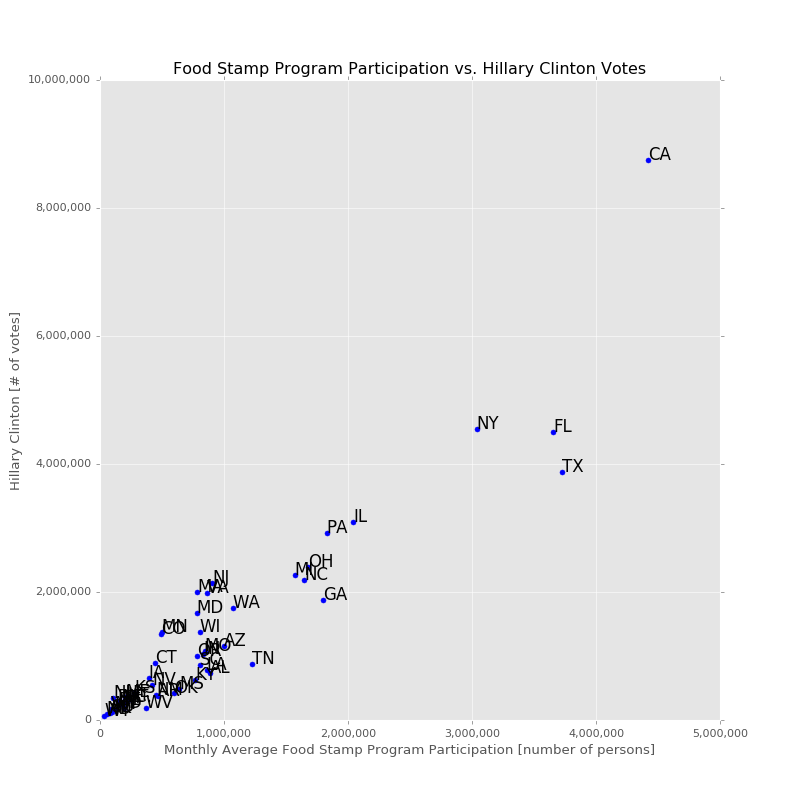

In [4]:
plt.rcParams['figure.figsize'] = (10,10)
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(fs,c,color="blue")
for i,j,k in zip(fs,c,state):
    ax.annotate('%s' %k, xy=(i,j), fontsize=15,color='black')

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_title('Food Stamp Program Participation vs. Hillary Clinton Votes')
plt.xlabel('Monthly Average Food Stamp Program Participation [number of persons]')
plt.ylabel('Hillary Clinton [# of votes]')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

**[Question 1]** What is this plot telling us? What kind of conclusions can we draw from this plot?

**[Answer 1]** Looking at this scatter plot one would immediately conclude that the lesser the number of participants in the food stamp program is in a state the less likely it is for that state is going to vote for Hillary Clinton which is a Democratic candidate.

**[Question 2]** What's wrong with this plot?

**[Answer 2]** If we look at the x and y values we see that we've used absolute population numbers across all states. Therefore it is natural to see California, the state with the highest population having the highest number of food stamp participants and the highest number of votes. Using absolute population numbers is not helping us with analyzing the relationship between these two variables. In order for our analysis to be correct we would have to normalize these numbers with the total population living in the state. In other words rather than using absolute numbers we should be using percentages. 

**[Assignment 1]** How do we normalize these numbers and convert them into percentages?

**[Solution 1]**

In [5]:
c_p = np.asarray(elec_data['Clinton']/elec_data['Sum'])
t_p = np.asarray(elec_data['Trump']/elec_data['Sum'])
fs_p = np.asarray(fs_data['Participation']/census_data['Population'])

Let's now redo the plot:

<IPython.core.display.Javascript object>


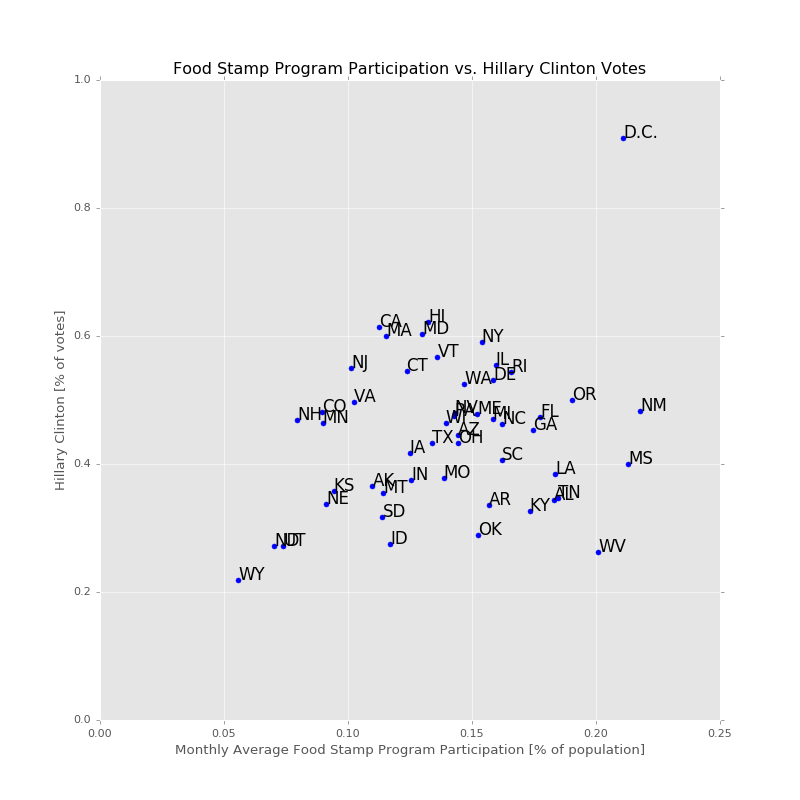

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(fs_p,c_p,color="blue")
for i,j,k in zip(fs_p,c_p,state):
    ax.annotate('%s' % k, xy=(i, j), fontsize=15, color='black')
plt.ylim([0,1])
plt.title('Food Stamp Program Participation vs. Hillary Clinton Votes')
plt.xlabel('Monthly Average Food Stamp Program Participation [% of population]')
plt.ylabel('Hillary Clinton [% of votes]')

**[Assignment 2]** Do the same exploratory analysis for the Republican candidate.

**[Solution 2]**

<IPython.core.display.Javascript object>


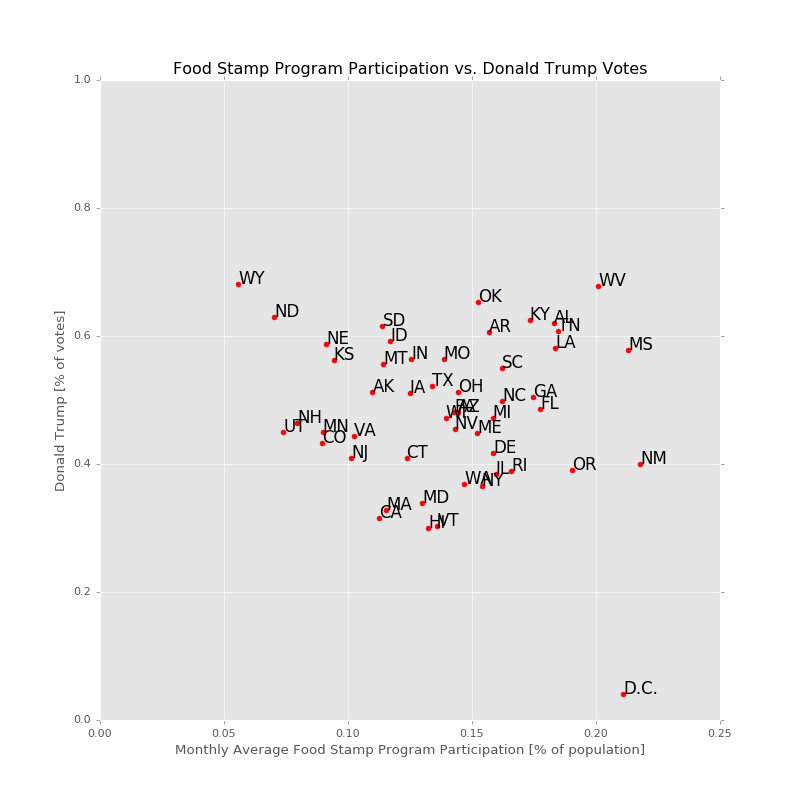

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(fs_p,t_p,color="red")
for i,j,k in zip(fs_p,t_p,state):
    ax.annotate('%s' % k, xy=(i, j), fontsize=15, color='black')
plt.ylim([0,1])
plt.title('Food Stamp Program Participation vs. Donald Trump Votes')
plt.xlabel('Monthly Average Food Stamp Program Participation [% of population]')
plt.ylabel('Donald Trump [% of votes]')

Finally, let's do a side by side comparison of the two plots.

<IPython.core.display.Javascript object>


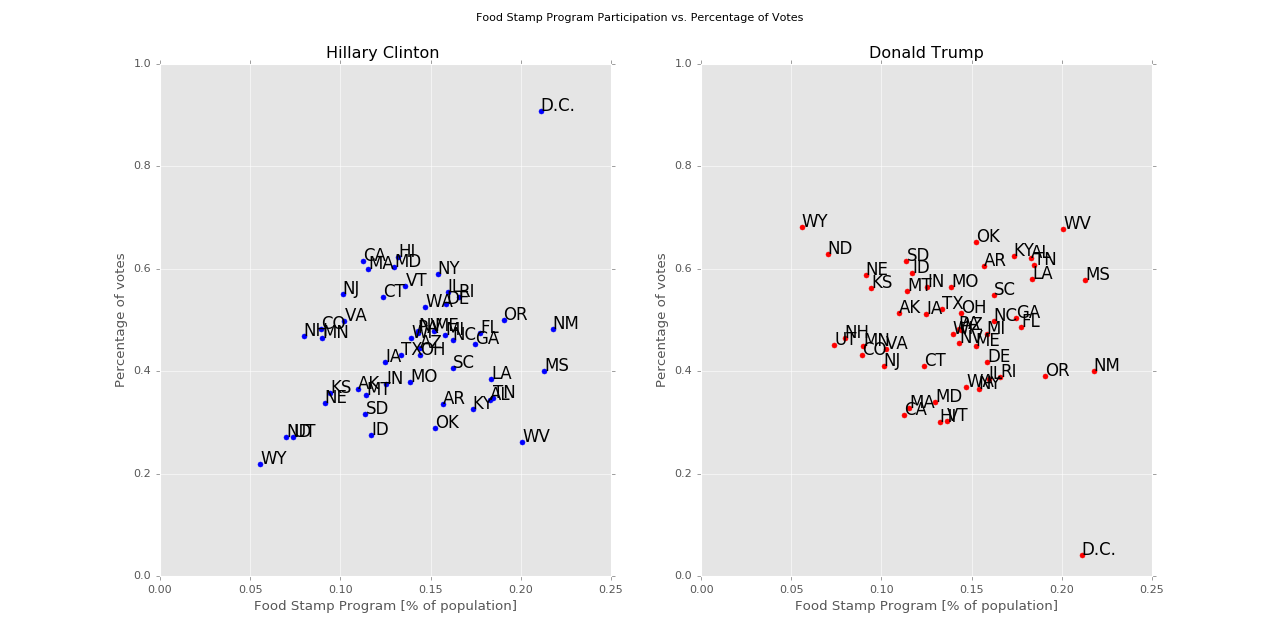

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Food Stamp Program Participation vs. Percentage of Votes")
ax[0].scatter(fs_p,c_p,color="blue")
for i,j,k in zip(fs_p,c_p,state):
    ax[0].annotate('%s' % k, xy=(i, j), fontsize=15, color='black')
ax[0].set_xlim(left=0)
ax[0].set_ylim([0,1])
ax[0].set_title('Hillary Clinton ')
ax[0].set_xlabel('Food Stamp Program [% of population]')
ax[0].set_ylabel('Percentage of votes')


ax[1].scatter(fs_p,t_p,color="red")
for i,j,k in zip(fs_p,t_p,state):
    ax[1].annotate('%s' % k, xy=(i, j), fontsize=15, color='black')
plt.ylim([0,1])
plt.title('Donald Trump')
plt.xlabel('Food Stamp Program [% of population]')
plt.ylabel('Percentage of votes')

**[Question 3]** Let's compare the plots between the Democratic and Republican candidates and see if we can draw some conclusions?

**[Answer 3]** If we compare the two plots we notice a weak trend where it is more likely for states that have high perecentage of participants in the food stamp program to vote for a Democratic candidate. This is in line with previous analysis also covered in Prof. Gelman's book. On the other hand states that voted for Donald Trump don't necessarly always have a small percentage of participants in the food stamp program. Another observation is that in states such as WV that have high food stamp program participation the wining candidate is Donald Trump. 

We can also compute the Pearson correlation coefficient:

In [9]:
import scipy.stats
pc_t = round(scipy.stats.pearsonr(fs_p,t_p)[0],3)
pc_c = round(scipy.stats.pearsonr(fs_p,c_p)[0],3)
print ("Pearson correlation for the Republican candidate is, R="+str(pc_t))
print ("Pearson correlation for the Democratic candidate is, R="+str(pc_c))

Pearson correlation for the Republican candidate is, R=-0.115
Pearson correlation for the Democratic candidate is, R=0.247


Next, let's look into the average household income per state and visually analyze their relationship with the candidate votes.

<IPython.core.display.Javascript object>


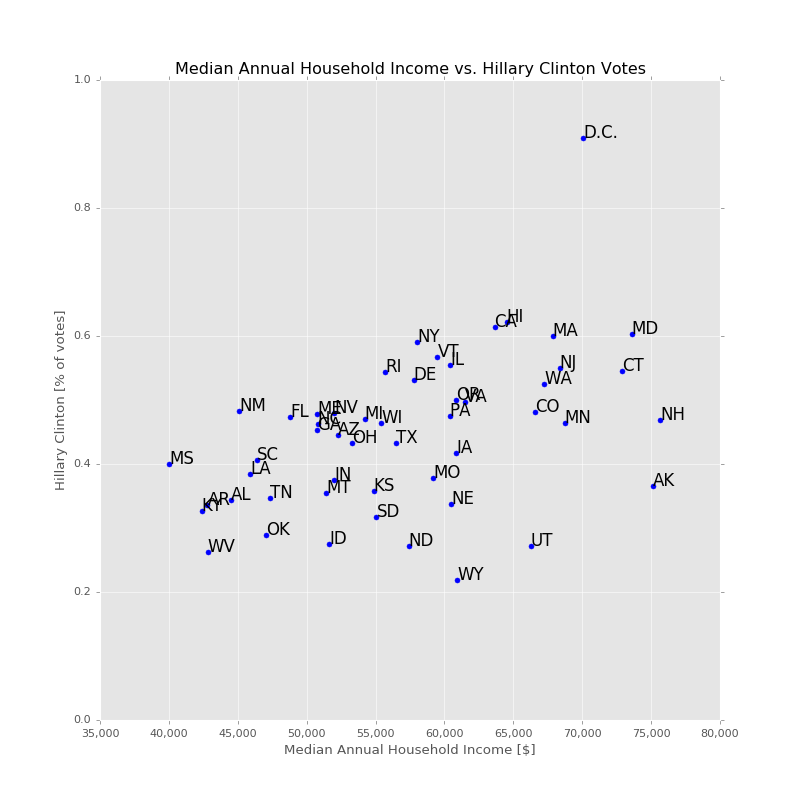

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(income,c_p,color="blue")
for i,j,k in zip(income,c_p,state):
    ax.annotate('%s' % k, xy=(i, j), fontsize=15, color='black')
plt.ylim([0,1])
plt.title('Median Annual Household Income vs. Hillary Clinton Votes')
plt.xlabel('Median Annual Household Income [$]')
plt.ylabel('Hillary Clinton [% of votes]')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

<IPython.core.display.Javascript object>


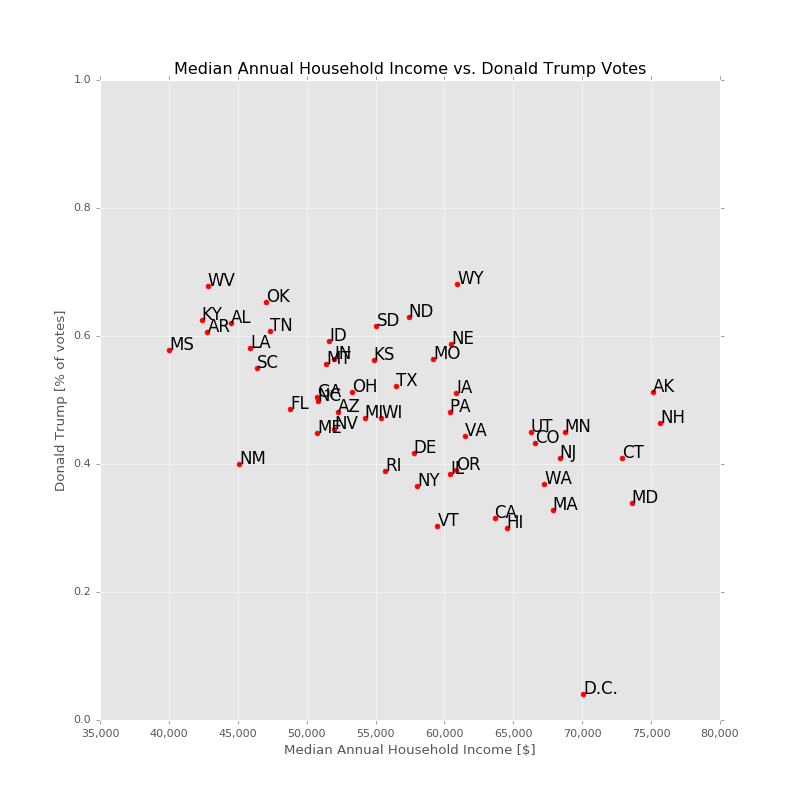

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(income,t_p,color="red")
for i,j,k in zip(income,t_p,state):
    ax.annotate('%s' % k, xy=(i, j), fontsize=15, color='black')

plt.ylim([0,1])
plt.title('Median Annual Household Income vs. Donald Trump Votes')
plt.xlabel('Median Annual Household Income [$]')
plt.ylabel('Donald Trump [% of votes]')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


**[Assignment 3]** Do a side by side comparison of the two plots.

**[Solution 3]**

<IPython.core.display.Javascript object>


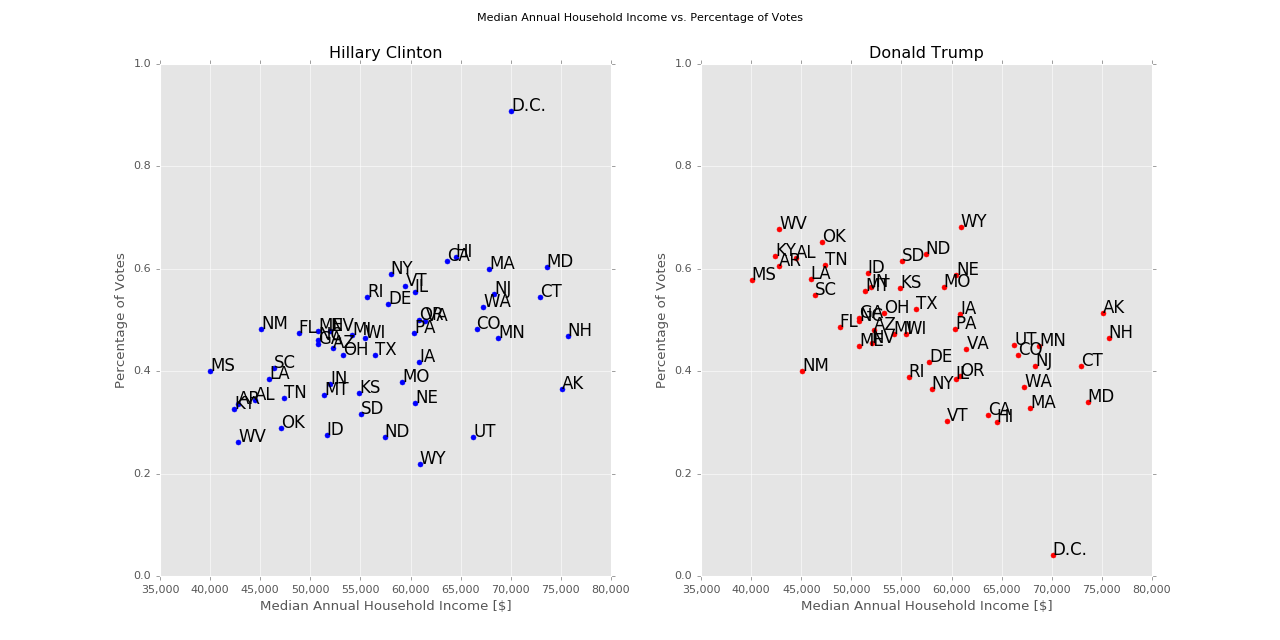

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Median Annual Household Income vs. Percentage of Votes")
ax[0].scatter(income,c_p,color="blue")
for i,j,k in zip(income,c_p,state):
    ax[0].annotate('%s' % k, xy=(i, j), fontsize=15, color='black')
ax[0].set_ylim([0,1])
ax[0].set_title('Hillary Clinton')
ax[0].set_xlabel('Median Annual Household Income [$]')
ax[0].set_ylabel('Percentage of Votes')
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax[1].scatter(income,t_p,color="red")
for i,j,k in zip(income,t_p,state):
    ax[1].annotate('%s' % k, xy=(i, j), fontsize=15, color='black')

ax[1].set_ylim([0,1])
ax[1].set_title('Donald Trump')
ax[1].set_xlabel('Median Annual Household Income [$]')
ax[1].set_ylabel('Percentage of Votes')
ax[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))



**[Question 4]** What kind of conclusions can we draw from comparing the above two plots?

**[Answer 4]** These plots depecit a different trend from the one observed earlier. It appears that the higher the median household income is the more likely it is that the state is going to vote for a Democratic candidate. 

**[Question 5]** What's wrong with this observation?

**[Answer 5]** These plots were created using median household income which doesn't emphasize the income difference across the individual income classes. In fact it is well established that the higher the household income is the more likely it is that they'll vote for a Republican candidate. 

We can also compute the Pearson correlation coefficient:

In [13]:
import scipy.stats
pc_t = round(scipy.stats.pearsonr(income,t_p)[0],3)
pc_c = round(scipy.stats.pearsonr(income,c_p)[0],3)
print ("Pearson correlation for the Republican candidate is, R="+str(pc_t))
print ("Pearson correlation for the Democratic candidate is, R="+str(pc_c))

Pearson correlation for the Republican candidate is, R=-0.58
Pearson correlation for the Democratic candidate is, R=0.473


## NYC Open Data ##

Next we are going to analyze two datasets from the NYC Open Data project. While the data is available through the links provided above we'll use a copy located on the bootcamp google drive folder. 
Once you download the data you should look into the collection description which explains the values stored in each data column.
1. Street Tree Census Data
Consult the following pdf document:  
https://data.cityofnewyork.us/api/views/uvpi-gqnh/files/8705bfd6-993c-40c5-8620-0c81191c7e25?download=true&filename=StreetTreeCensus2015TreesDataDictionary20161102.pdf  

2. NYPD Motor Vehicle Collision Data  
Go over the column headers


 # 2. 2015 Street Tree Census #
 

Given that we spent some time learning about the nature of this data. Let's now load the data:

In [14]:

import pandas as pd
tree_data_fn2 = './street_tree_census_data/2015_Street_Tree_Census_-_Tree_Data.tsv'
tree_data2 = pd.read_csv(tree_data_fn2, delimiter='\t')


First we'll compute basic statistics over a selected set of variables from the second tree dataset. Statitics such as:
* mean
* median
* standard deviation
* variance
* quantiles

In [15]:
import numpy as np
size = len(tree_data2.tree_dbh)
print ("Size="+str(size))
min_val = min(tree_data2.tree_dbh)
print ("Minimum value="+str(min_val))
max_val = max(tree_data2.tree_dbh)
print ("Maximum value="+str(max_val))
mean1 = np.mean(tree_data2.tree_dbh)
print ("Mean value="+str(mean1))

Size=446664
Minimum value=0
Maximum value=424083
Mean value=12.3157115863


In [16]:
median_val = np.median(tree_data2.tree_dbh)
print ("Median value="+str(median_val))

Median value=9.0


In [17]:
std_val = np.std(tree_data2.tree_dbh)
print ("Standard Deviation="+str(std_val))

Standard Deviation=634.584374736


In [18]:
var_val = np.var(tree_data2.tree_dbh)
print ("Variation="+str(var_val))

Variation=402697.328659


In [19]:
print (np.percentile(tree_data2.tree_dbh,25))

4.0


In [20]:
print (np.percentile(tree_data2.tree_dbh,50))

9.0


In [21]:
print (np.percentile(tree_data2.tree_dbh,75))

16.0


In [22]:
print (np.percentile(tree_data2.tree_dbh,95))

29.0


The Pandas package has some really cool features which are worth exploring and learning about. For example the above values could be computed with a single Pandas method:

In [23]:
tree_data2['tree_dbh'].describe()

count    446664.000000
mean         12.315712
std         634.585085
min           0.000000
25%           4.000000
50%           9.000000
75%          16.000000
max      424083.000000
Name: tree_dbh, dtype: float64

For more information on the Pandas methods see the online documentation:  
http://pandas.pydata.org/pandas-docs/stable/  

Spend some time to familiarize yourself with the data. Decide which aspects of that data you find interesting and select a set of variables that you would like to explore further or follow the example below.

### Example ###  

Find out which borough has the most ammount of trees where shoes could be found in the branches:

In [24]:
tree_data2['brch_shoe'].groupby(tree_data2['boroname']).describe()

boroname             
Bronx          count      46075
               unique         2
               top           No
               freq       46009
Brooklyn       count     115783
               unique         2
               top           No
               freq      115693
Little Neck    count          1
               unique         1
               top           No
               freq           1
Manhattan      count      37697
               unique         2
               top           No
               freq       37660
Queens         count     184137
               unique         2
               top           No
               freq      184077
Staten Island  count      62971
               unique         2
               top           No
               freq       62963
dtype: object

In [25]:
tree_data2.groupby(['boroname', 'brch_shoe']).size()

boroname       brch_shoe
Bronx          No            46009
               Yes              66
Brooklyn       No           115693
               Yes              90
Little Neck    No                1
Manhattan      No            37660
               Yes              37
Queens         No           184077
               Yes              60
Staten Island  No            62963
               Yes               8
dtype: int64

What's wrong with the output from these two methods?

It appears that the tsv file contains entries for a borough named "Little Neck". Let's make sure that this is indeed the case.

In [26]:
tree_data2['boroname'].str.contains('Little Neck').any()
  

True

In [27]:
tree_data2[tree_data2['boroname']=='Little Neck']

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
43,196089,310255,09/02/2015,424083,323018,11/3/2015,1,0,OnCurb,Alive,...,4,NaN,19,26,11,QN45,NaN,4148300.0,NaN,40.77536


**[Assignment 4]** Let's compute the percentage of trees in each borough that have shoes in their branches

**[Solution 4]**

In [28]:
boro_shoes = tree_data2[['boroname', 'brch_shoe']]
shoes_counts = pd.value_counts(boro_shoes['boroname'])
shoes_counts

Queens           184137
Brooklyn         115783
Staten Island     62971
Bronx             46075
Manhattan         37697
Little Neck           1
Name: boroname, dtype: int64

In [29]:
yes_shoes = boro_shoes[boro_shoes['brch_shoe']=='Yes']
yes_counts = pd.value_counts(yes_shoes['boroname'])
yes_counts

Brooklyn         90
Bronx            66
Queens           60
Manhattan        37
Staten Island     8
Name: boroname, dtype: int64

In [30]:
no_shoes = boro_shoes[boro_shoes['brch_shoe']=='No']
no_counts = pd.value_counts(no_shoes['boroname'])
no_counts

Queens           184077
Brooklyn         115693
Staten Island     62963
Bronx             46009
Manhattan         37660
Little Neck           1
Name: boroname, dtype: int64

In [31]:
percentage_shoes = yes_counts/(yes_counts+no_counts)*100
percentage_shoes

Bronx            0.143245
Brooklyn         0.077732
Little Neck           NaN
Manhattan        0.098151
Queens           0.032584
Staten Island    0.012704
Name: boroname, dtype: float64

Now that we have a better understanding of our data let's do some plotting. Let's do a bar plot of the  different types of tree species:

In [32]:
species = pd.value_counts(tree_data2['spc_common'])
species.head(50)

London planetree          58570
honeylocust               43255
Callery pear              38306
pin oak                   37082
Norway maple              21537
littleleaf linden         20231
cherry                    20219
Japanese zelkova          19679
ginkgo                    13729
Sophora                   12612
red maple                 11143
green ash                 10816
American linden            8841
silver maple               8151
sweetgum                   7009
silver linden              5958
maple                      5729
northern red oak           5686
American elm               5348
swamp white oak            4631
purple-leaf plum           4527
crimson king maple         3958
Chinese elm                3373
'Schubert' chokecherry     3236
Japanese tree lilac        3170
eastern redbud             2537
Kentucky coffeetree        2408
golden raintree            2323
ash                        2197
crab apple                 2192
hawthorn                   2079
willow o

<IPython.core.display.Javascript object>


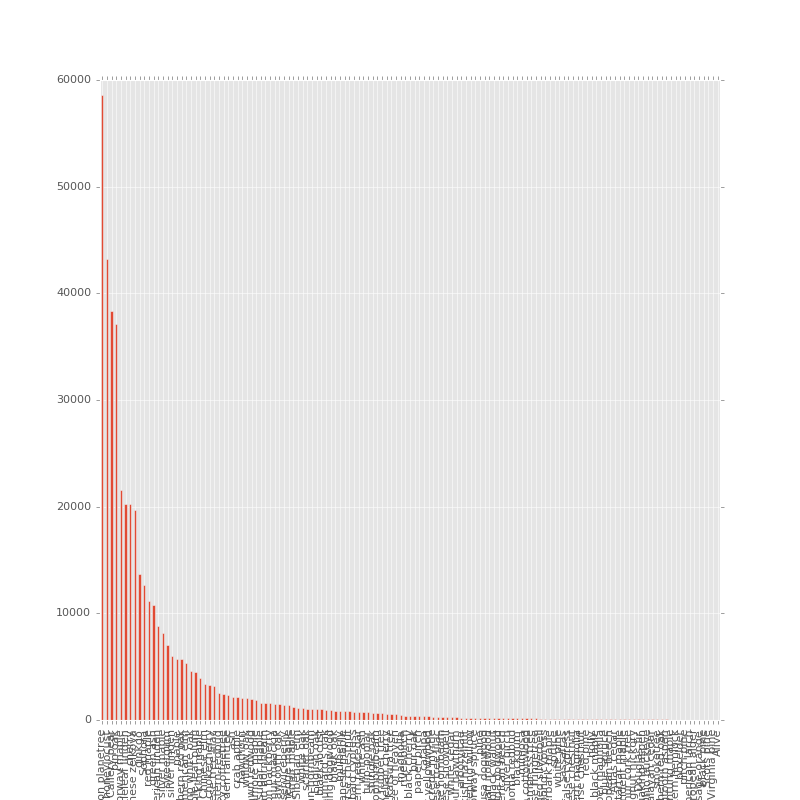

In [33]:
fig = plt.figure()
plot = species.plot(kind='bar')
plt.rcParams['figure.figsize'] = (15,15)
plt.show()


Finally we'll analyze the data using boxplot. For each category value the box plot displays the range of variation, including the first and third quartile and the median value. Using boxplot we'll analyze the statistics of the diameter of the tree at the breast height (tree_dbh) across the different boroughs.

Before we do that let's first remove the bad entry in the data set:

In [34]:
tree_data2=tree_data2.ix[tree_data2['tree_dbh'] <424083].copy(deep=True)

<IPython.core.display.Javascript object>


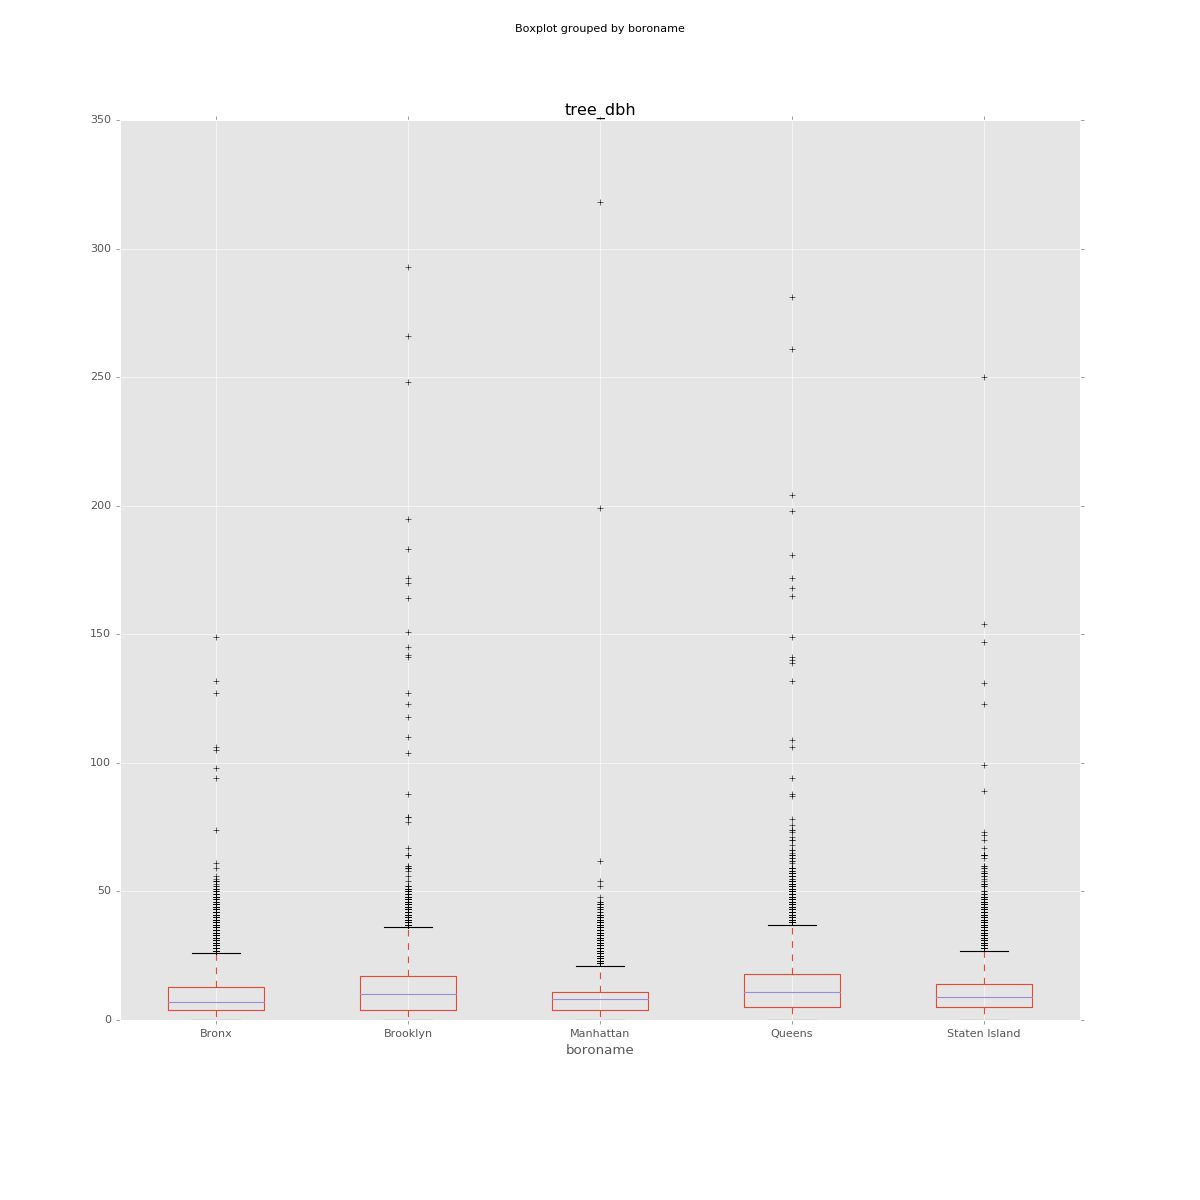

In [35]:
diam_stat = tree_data2[['boroname','tree_dbh']]
diam_stat.boxplot(column="tree_dbh", by="boroname")

## 3. NYPD Motor Vehicle Collision Data ##

In this part of the lab session we'll spend some time in learning about and exploring the NYPD motor vehicle collision data.

Let's first load the data using Pandas:

In [36]:
coll_data_fn = './NYPD_Motor_Vehicle_Collisions.tsv'
coll_data = pd.read_csv(coll_data_fn, delimiter='\t')
coll_data

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,08/25/2015,19:00,NaN,NaN,40.732941,-73.920382,"(40.7329414, -73.9203819)",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3284922,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
1,07/27/2012,22:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2833714,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,05/17/2014,0:45,NaN,NaN,NaN,NaN,NaN,PENNSYLVANIA AVENUE,RIVERDALE AVENUE,NaN,...,NaN,NaN,NaN,NaN,336679,NaN,NaN,NaN,NaN,NaN
3,11/10/2016,15:11,NaN,NaN,NaN,NaN,NaN,MONROE STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3559084,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
4,05/11/2016,14:01,BROOKLYN,11217.0,40.685885,-73.973376,"(40.6858851, -73.9733756)",FULTON STREET,SOUTH OXFORD STREET,NaN,...,Unspecified,NaN,NaN,NaN,3440855,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
5,05/11/2016,14:05,MANHATTAN,10016.0,40.750218,-73.979056,"(40.750218, -73.979056)",EAST 39 STREET,PARK AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3439718,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
6,05/11/2016,14:05,QUEENS,11435.0,NaN,NaN,NaN,NaN,NaN,138-19 HILLSIDE AVENUE,...,Unspecified,NaN,NaN,NaN,3440233,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
7,05/11/2016,14:07,NaN,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,NaN,...,Unspecified,NaN,NaN,NaN,3440245,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
8,05/11/2016,14:15,BRONX,10454.0,40.809060,-73.907538,"(40.8090601, -73.907538)",EAST 144 STREET,SOUTHERN BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,3439814,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
9,05/11/2016,14:15,BRONX,10468.0,40.869834,-73.898740,"(40.8698344, -73.8987397)",NaN,NaN,2756 RESERVOIR AVENUE,...,Unspecified,NaN,NaN,NaN,3440604,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


Take some time to go over the datasets and decide on which column/columns you would like to compute statistics over or continue with the example below. In case the data is categorical and/or doesn't contain numerical values we would need to first make the conversion by enumerating/mapping the values. Please consult the Pandas documentation on how to do that.  
Unlike the tree census data, the NYPD vehicle collision data doesn't come with additional documentation. Therefore we need to learn about the data types in this collection from the tsv headers. 

In [37]:
coll_data.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

### Example ###

Rank the NYC boroughs based on the number of cyclists killed and injured using the collision data.

In [38]:
coll_data['CYCLIST INJURED OR KILLED']= coll_data['NUMBER OF CYCLIST INJURED']+coll_data['NUMBER OF CYCLIST KILLED']

In [39]:
cyclist_stat = coll_data[['BOROUGH', 'NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','CYCLIST INJURED OR KILLED']]

In [40]:
cyc_sum = cyclist_stat.groupby('BOROUGH').sum()


**[Assignment 5]** For each borough compute the percentage of cyclists injured or killed out of the total number of injured or killed as provided in this collision dataset. Plot the results using a histogram. 

**[Solution 5]**

In [41]:
coll_data['INJURED OR KILLED']= coll_data['NUMBER OF CYCLIST INJURED']+coll_data['NUMBER OF CYCLIST KILLED']+coll_data['NUMBER OF PERSONS INJURED']+coll_data['NUMBER OF PERSONS KILLED']+coll_data['NUMBER OF MOTORIST INJURED']+coll_data['NUMBER OF MOTORIST KILLED']
collision_all = coll_data[['BOROUGH', 'INJURED OR KILLED']]
collision_sum = collision_all.groupby('BOROUGH').sum()
collision_sum

,INJURED OR KILLED
BOROUGH,
BRONX,47073
BROOKLYN,114279
MANHATTAN,51246
QUEENS,85958
STATEN ISLAND,14770


In [42]:
percentage_cyclist = cyc_sum['CYCLIST INJURED OR KILLED']/collision_sum['INJURED OR KILLED']
percentage_cyclist

BOROUGH
BRONX            0.033905
BROOKLYN         0.061122
MANHATTAN        0.102428
QUEENS           0.039996
STATEN ISLAND    0.012051
dtype: float64

<IPython.core.display.Javascript object>


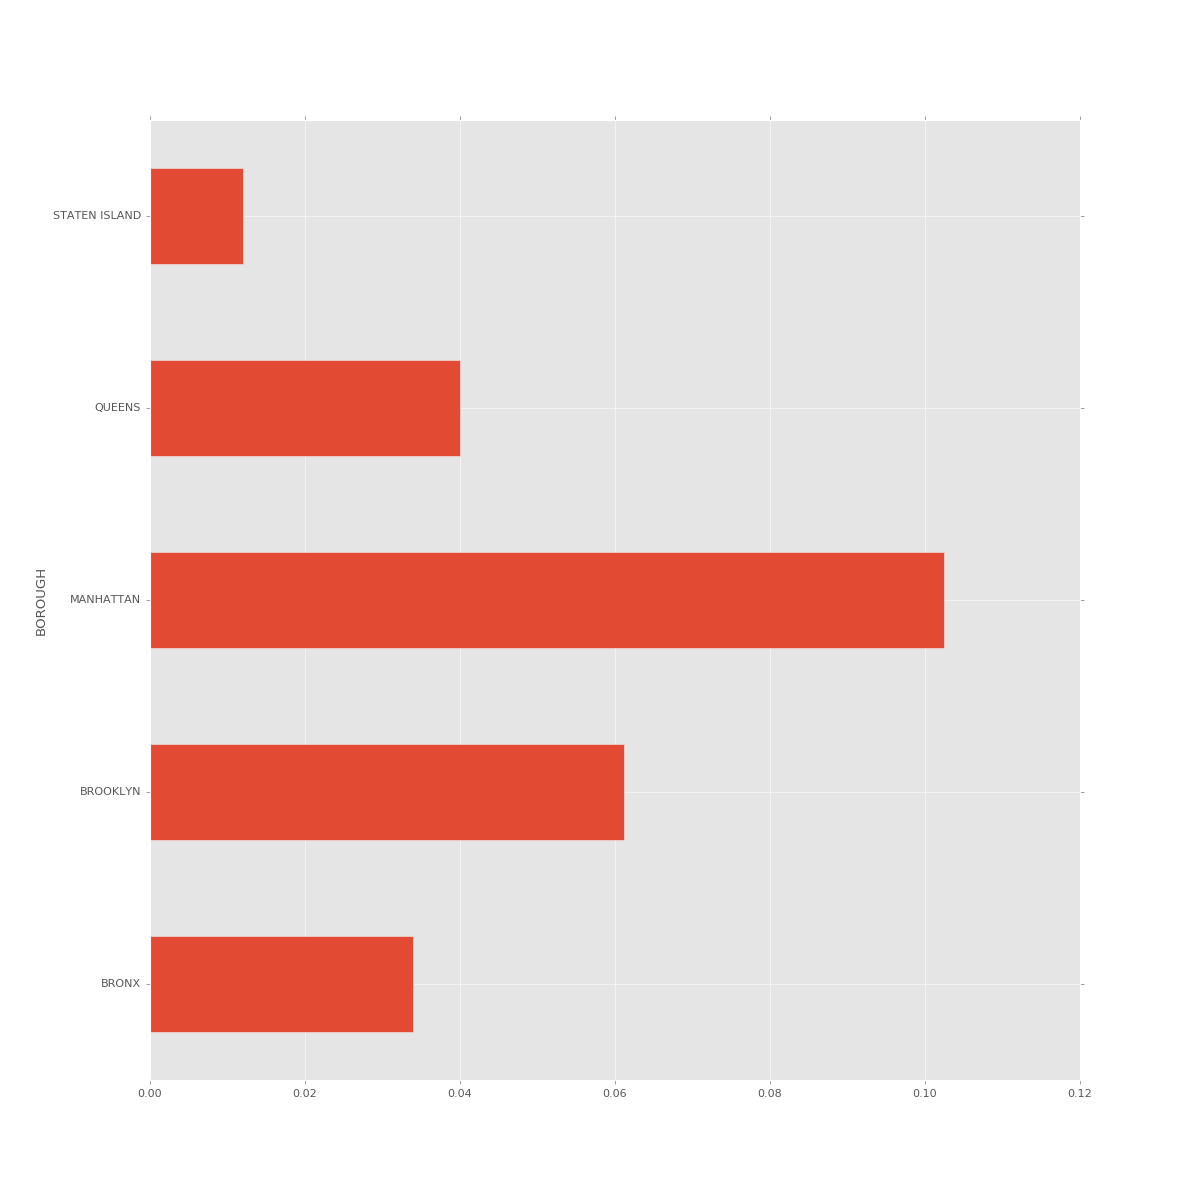

In [43]:
fig = plt.figure()
percentage_cyclist.plot.barh()

**[Assignment 6]** Compute the distribution of cyclists injured and killed across all boroughs given the total number of such incidents. 

**[Solution 6]**

In [44]:
cyc_sum = cyclist_stat.groupby('BOROUGH').sum()
borough_cyc_sum = cyc_sum.sum()
borough_cyc_sum

NUMBER OF CYCLIST INJURED    17387
NUMBER OF CYCLIST KILLED        59
CYCLIST INJURED OR KILLED    17446
dtype: int64

In [45]:
cyc_borough = cyc_sum['CYCLIST INJURED OR KILLED']/borough_cyc_sum['CYCLIST INJURED OR KILLED']
cyc_borough

BOROUGH
BRONX            0.091482
BROOKLYN         0.400378
MANHATTAN        0.300871
QUEENS           0.197065
STATEN ISLAND    0.010203
Name: CYCLIST INJURED OR KILLED, dtype: float64

<IPython.core.display.Javascript object>


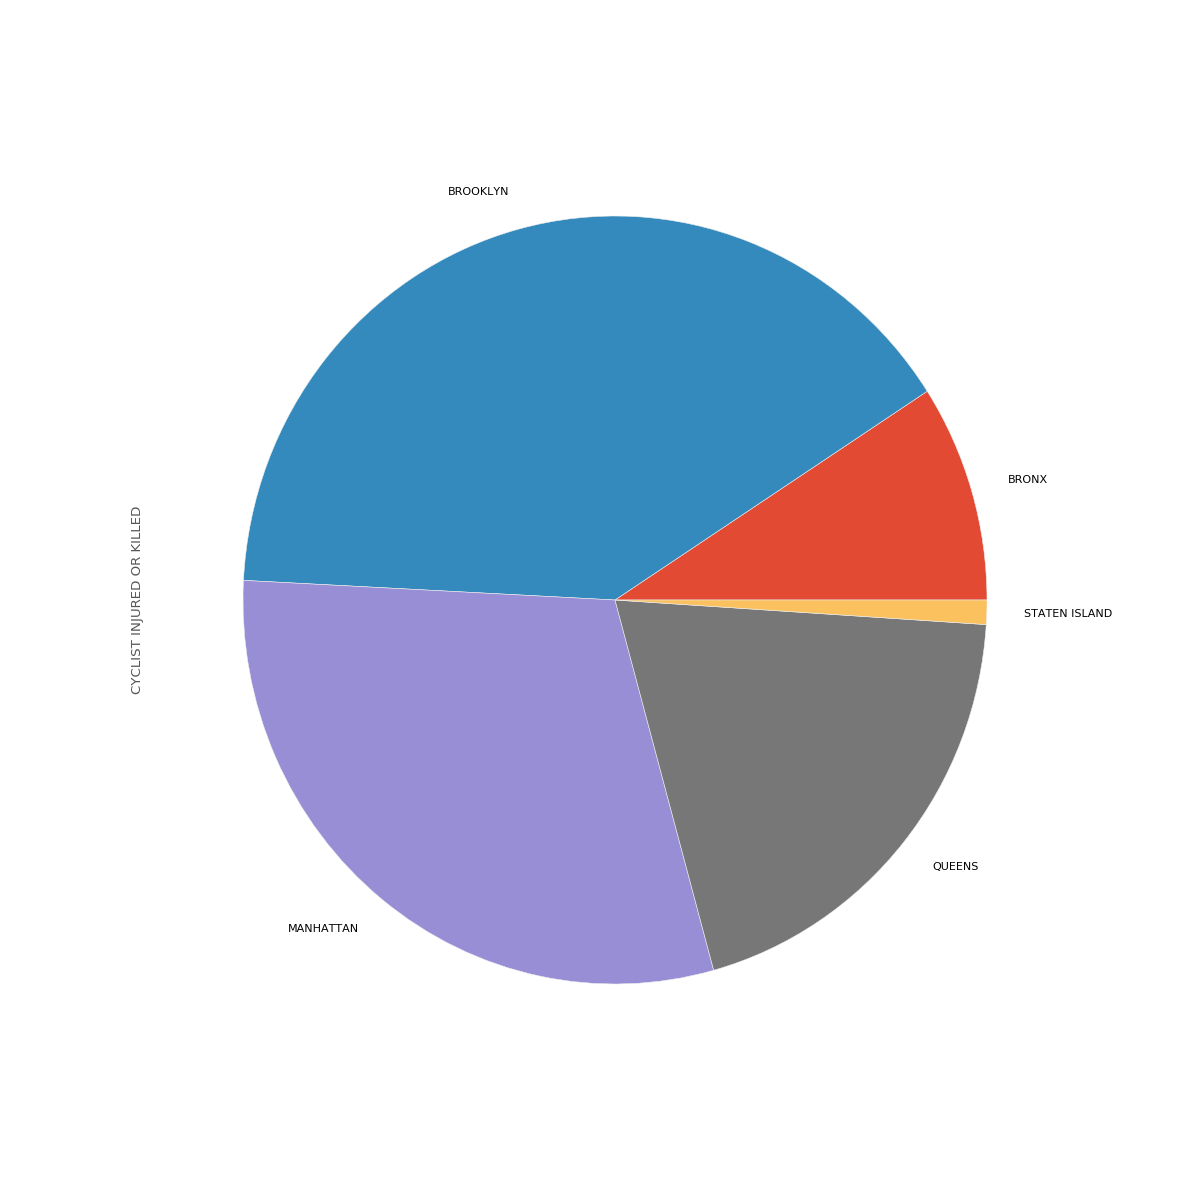

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ca85250>], dtype=object)

In [46]:
fig = plt.figure()
cyc_borough.plot(kind='pie',subplots='True')